# Critical $\chi^2$ values
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import gamma

### (1) Definition of confidence level limit

In [2]:
# Return value of x corresponsing to Frequentist upper (one-sided) limit on given CL
# Use 1-CL for lower limit

def problim(Ndf,cl):
    
    # Gamma distribution parameters for given Ndf
    
    mean = Ndf
    sigma = np.sqrt(2.*Ndf)
 
    k = (mean/sigma)**2
    invlam = sigma**2/mean

    # Use inverse survival function from scipy (inverse of 1 - cumulative distribution)

    xlim = gamma.isf(1-cl,k, scale=invlam)

    return xlim


### (2) Define considered probability values

In [3]:
# Considered values of probability

pvec = np.array([0.01,0.05,0.1,0.5,0.9,0.95,0.99])

# Considered degrees of freedom

Nmax = 20

nvec = np.arange(1,Nmax+1)


### (3)  Calculate critical $\chi^2$ curves

In [4]:
chi2tab = np.empty((pvec.size,nvec.size))

for ip in range(pvec.size) :
    cl = pvec[ip]
    chi2tab[ip,:] = problim(nvec,cl)/nvec


### (4) Draw critical $\chi^2$ curves

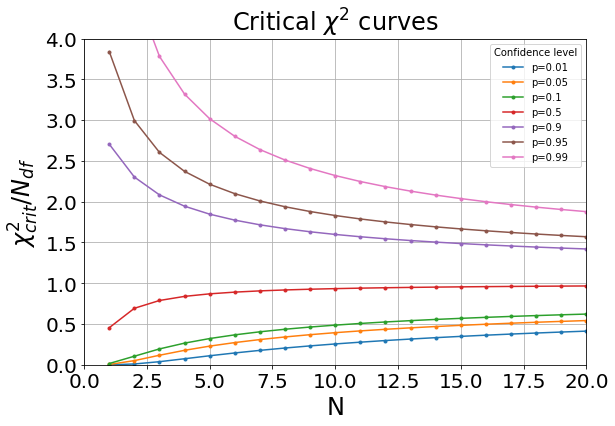

In [6]:
# Histogram frame

Xmin=0
Xmax=Nmax
Ymin=0
Ymax=4.   #  1.1*np.max(chi2tab)

# Plot curves

plt.figure(figsize=(9, 6))

for ip in range(pvec.size) :
    cl = pvec[ip]
    plt.plot(nvec,chi2tab[ip,:],'.-',label='p='+str(cl))


plt.title('Critical $\chi^{2}$ curves',size=24)
plt.xlabel('N',size=24)
plt.ylabel('$\chi^2_{crit}/N_{df}$',size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([Xmin,Xmax])
plt.ylim([Ymin,Ymax])
plt.grid(which='major', axis='both')
plt.legend(title="Confidence level")

fname = '08_critical.png'
plt.savefig(fname)

plt.show()